# Supervised Learning of Actions - Logistic Regression
This note fits a logistic regression model to the sepsis data.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
exportdir='/data/localhost/taufiq/export-dir/'

In [2]:
import logging
logging.basicConfig(filename='logistic-regression.log', level=logging.INFO)

In [3]:
nra = 5
nr_reps = 1

In [4]:
MIMICtable = pd.read_csv(exportdir + '/MIMIC-1hourly-length-5.csv')
MIMICtable = MIMICtable.sort_values(by=['icustay_id', 'bloc'], ignore_index=True)
MIMICtable.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,mechvent,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance
0,1,3,7.245400e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.663900,599.999991,0.0,0.0,6267.0,0.0,9490.0,4705.0,-3223.0
1,2,3,7.245403e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.672340,339.999995,0.0,0.0,6267.0,10.0,14095.0,4605.0,-7818.0
2,3,3,7.245407e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.649789,339.999995,0.0,0.0,6277.0,20.0,18540.0,4445.0,-12243.0
3,4,3,7.245410e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.634454,339.999995,0.0,0.0,6297.0,20.0,22845.0,4305.0,-16528.0
4,5,3,7.245414e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.645714,497.499993,0.0,0.0,6317.0,20.0,27050.0,4205.0,-20713.0


In [5]:
import os
import glob
os.chdir("/data/localhost/taufiq/pulse-data-5-step")
extension = 'final_.csv'
all_filenames = [i for i in glob.glob('*{}'.format(extension))]
pulse_data = pd.concat([pd.read_csv(f) for f in all_filenames ])
pulse_data = pulse_data.rename(columns={'id': 'icustay_id'})
pulse_data['icustay_id'] = pulse_data['icustay_id'].astype(int)
pulse_data = pulse_data.reset_index(drop=True)
pulse_data = pulse_data.sort_values(by=['icustay_id', 'SimulationTime(s)'], ignore_index=True)
pulse_data['bloc'] = np.arange(len(pulse_data))%5 + 1
pulse_data.head()

,Albumin - BloodConcentration (mg/L),ArterialCarbonDioxidePressure (mmHg),ArterialOxygenPressure (mmHg),ArterialPressure (mmHg),Bicarbonate - BloodConcentration (mg/L),BloodPH (None),BloodUreaNitrogenConcentration (mg/dL),BloodVolume (mL),Calcium - BloodConcentration (mg/L),CarbonDioxideSaturation (None),...,RespirationRate (1/min),SaturationAndFractionOfInspiredOxygenRatio (None),SimulationTime(s),SkinTemperature (degC),Sodium - BloodConcentration (mg/L),SystolicArterialPressure (mmHg),WhiteBloodCellCount (ct/uL),icustay_id,time,bloc
0,36971.911153,40.121759,90.942581,88.417880,1590.189288,7.412477,13.036798,4640.620191,48.207067,0.028632,...,20.134228,4.646044,0.0,33.130515,3327.522356,119.898164,7000.0,3,7.245400e+09,1
1,35899.080416,40.295497,92.240242,92.028320,1590.361120,7.410769,15.109420,4769.504190,54.298146,0.028445,...,20.833333,4.645351,3600.0,32.814843,3316.814960,121.301612,7000.0,3,7.245403e+09,2
2,34887.421594,40.313523,92.215037,106.015304,1590.284502,7.410592,20.730085,4897.953845,60.775848,0.028452,...,20.833333,4.645612,7200.0,32.533793,3307.756345,123.275558,7000.0,3,7.245407e+09,3
3,33927.979505,40.325572,92.262822,103.367986,1590.257833,7.410474,25.855462,5026.549368,66.898886,0.028449,...,20.833333,4.645723,10800.0,32.765652,3302.748443,125.600846,7000.0,3,7.245410e+09,4
4,33088.536551,40.305062,92.327881,71.410965,1589.972682,7.410675,30.823689,5144.112833,72.855658,0.028455,...,20.833333,4.646063,14400.0,32.834440,3277.230920,126.459716,7000.0,3,7.245414e+09,5


In [6]:
column_mappings = {
    'Albumin - BloodConcentration (mg/L)': 'Albumin',
    'ArterialCarbonDioxidePressure (mmHg)': 'paCO2',
    'ArterialOxygenPressure (mmHg)': 'paO2',
    'Bicarbonate - BloodConcentration (mg/L)': 'HCO3',
    'BloodPH (None)': 'Arterial_pH',
    'Calcium - BloodConcentration (mg/L)': 'Calcium',
    'Chloride - BloodConcentration (mg/L)': 'Chloride',
    'Creatinine - BloodConcentration (mg/L)': 'Creatinine',
    'DiastolicArterialPressure (mmHg)': 'DiaBP',
    'Glucose - BloodConcentration (mg/L)': 'Glucose',
    'Lactate - BloodConcentration (mg/L)': 'Arterial_lactate',
    'MeanArterialPressure (mmHg)': 'MeanBP',
    'Potassium - BloodConcentration (mg/L)': 'Potassium',
    'RespirationRate (1/min)': 'RR',
    'SkinTemperature (degC)': 'Temp_C',
    'Sodium - BloodConcentration (mg/L)': 'Sodium',
    'SystolicArterialPressure (mmHg)': 'SysBP',
    'WhiteBloodCellCount (ct/uL)': 'WBC_count',
    'HeartRate (1/min)': 'HR'
}

pulse_rename = {}

for k, v in column_mappings.items():
    pulse_rename.update({k: f"{v}"})

pulse_data = pulse_data.rename(columns=pulse_rename)

pulse_data = pulse_data.merge(MIMICtable[['gender', 'age', 'Weight_kg', 'icustay_id', 'bloc']], left_on=['icustay_id', 'bloc'], right_on=['icustay_id', 'bloc'])
pulse_data.head()

,Albumin,paCO2,paO2,ArterialPressure (mmHg),HCO3,Arterial_pH,BloodUreaNitrogenConcentration (mg/dL),BloodVolume (mL),Calcium,CarbonDioxideSaturation (None),...,Temp_C,Sodium,SysBP,WBC_count,icustay_id,time,bloc,gender,age,Weight_kg
0,36971.911153,40.121759,90.942581,88.417880,1590.189288,7.412477,13.036798,4640.620191,48.207067,0.028632,...,33.130515,3327.522356,119.898164,7000.0,3,7.245400e+09,1,0.0,17639.826435,66.300000
1,35899.080416,40.295497,92.240242,92.028320,1590.361120,7.410769,15.109420,4769.504190,54.298146,0.028445,...,32.814843,3316.814960,121.301612,7000.0,3,7.245403e+09,2,0.0,17639.826435,78.699997
2,34887.421594,40.313523,92.215037,106.015304,1590.284502,7.410592,20.730085,4897.953845,60.775848,0.028452,...,32.533793,3307.756345,123.275558,7000.0,3,7.245407e+09,3,0.0,17639.826435,78.699997
3,33927.979505,40.325572,92.262822,103.367986,1590.257833,7.410474,25.855462,5026.549368,66.898886,0.028449,...,32.765652,3302.748443,125.600846,7000.0,3,7.245410e+09,4,0.0,17639.826435,78.699997
4,33088.536551,40.305062,92.327881,71.410965,1589.972682,7.410675,30.823689,5144.112833,72.855658,0.028455,...,32.834440,3277.230920,126.459716,7000.0,3,7.245414e+09,5,0.0,17639.826435,78.699997


In [7]:
#################   Convert training data and compute conversion factors    ######################
logging.info('Processing raw data')
# all 47 columns of interest
colbin = ['gender']
colnorm = ['age','Weight_kg','HR','SysBP','MeanBP','DiaBP','RR','Temp_C',\
    'Potassium','Sodium','Chloride','Glucose','Calcium',\
    'WBC_count','Arterial_pH','HCO3','Arterial_lactate', 'paO2','paCO2', 'Albumin']
collog=['Creatinine']

MIMICraw = MIMICtable[colbin+colnorm].copy()
pulseraw = pulse_data[colbin+colnorm].copy()

for col in MIMICraw:
    if col in colbin:
        MIMICraw[col] = MIMICraw[col] - 0.5
        pulseraw[col] = pulseraw[col] - 0.5
    elif col in colnorm:
        cmu = MIMICraw[col].mean()
        csigma = MIMICraw[col].std()
        MIMICraw[col] = (MIMICraw[col] - cmu)/csigma
        pulseraw[col] = (pulseraw[col] - cmu)/csigma
    else:
        log_values = np.log(0.1 + MIMICraw[col])
        dmu = log_values.mean()
        dsigma = log_values.std()
        MIMICraw[col] = (log_values - dmu)/dsigma 
        pulseraw[col] = (np.log(0.1 + pulseraw[col]) - dmu)/dsigma 
logging.info('Raw data processed')

## Include the information for doses taken until time $t$

In [8]:
logging.info('Adding input values to X')

# MIMICraw['last_input'] = 0.0
# MIMICraw['total_input_before'] = 0.0
# MIMICraw['last_vaso_dose'] = 0.0

# for index, row in MIMICtable.iterrows():
#     if index < len(MIMICtable) - 1 and (MIMICtable.at[index+1,'icustay_id'] == MIMICtable.at[index,'icustay_id']):
#         MIMICraw.at[index+1, 'last_input'] = MIMICtable.at[index, 'input_1hourly']
#         MIMICraw.at[index+1, 'total_input_before'] = MIMICtable.at[index, 'input_total']
#         MIMICraw.at[index+1, 'last_vaso_dose'] = MIMICtable.at[index, 'max_dose_vaso']

def log_normalise(colname):
    global MIMICraw
    log_values = np.log(0.1 + MIMICraw[colname])
    dmu = log_values.mean()
    dsigma = log_values.std()
    MIMICraw[colname] = (log_values - dmu)/dsigma

# log_normalise('last_input')
# log_normalise('total_input_before')
# MIMICraw['last_vaso_dose'] = MIMICraw['last_vaso_dose'] - 0.5

logging.info('Input values added to X')

In [9]:
pulseraw.head()

,gender,age,Weight_kg,HR,SysBP,MeanBP,DiaBP,RR,Temp_C,Potassium,...,Chloride,Glucose,Calcium,WBC_count,Arterial_pH,HCO3,Arterial_lactate,paO2,paCO2,Albumin
0,-0.5,-1.045426,-0.635677,-0.201878,-0.074952,1.022051,0.547376,0.017945,-1.944897,-0.216509,...,-0.170839,-0.734866,-3.621278,-0.576816,0.369124,0.358605,-0.399198,-0.707879,-0.238535,0.596819
1,-0.5,-1.045426,-0.128726,-0.326644,-0.010774,1.036072,0.473408,0.144600,-2.110068,-0.401211,...,-0.866243,0.199222,-3.015047,-0.576816,0.350553,0.359138,-0.501247,-0.698052,-0.224661,0.449559
2,-0.5,-1.045426,-0.128726,-0.556979,0.079493,1.047040,0.346435,0.144600,-2.257124,-0.561786,...,-1.262772,0.210317,-2.370337,-0.576816,0.348631,0.358900,-0.589427,-0.698243,-0.223221,0.310695
3,-0.5,-1.045426,-0.128726,-0.764843,0.185826,1.068508,0.226273,0.144600,-2.135807,-0.714633,...,-1.636899,0.221509,-1.760925,-0.576816,0.347346,0.358818,-0.665101,-0.697881,-0.222259,0.178999
4,-0.5,-1.045426,-0.128726,-0.953370,0.225101,1.021378,0.078545,0.144600,-2.099814,-0.847611,...,-1.961100,0.231787,-1.168061,-0.576816,0.349533,0.357935,-0.728226,-0.697389,-0.223897,0.063775


## Create Actions


In [10]:
from sklearn.cluster import KMeans
from scipy.stats import rankdata

logging.info('Creating action bins')
nact = nra**2
input_1hourly_nonzero = MIMICtable.loc[MIMICtable['input_1hourly']>0, 'input_1hourly']
iol_ranked = rankdata(input_1hourly_nonzero)/len(input_1hourly_nonzero) # excludes zero fluid (will be action 1)
iof = np.floor((iol_ranked + 0.2499999999)*4) # converts iv volume in 4 actions
io = np.ones(len(MIMICtable)) # array of ones, by default
io[MIMICtable['input_1hourly']>0] = iof + 1 # where more than zero fluid given: save actual action
vc = MIMICtable['max_dose_vaso'].copy()
vc_nonzero = MIMICtable.loc[MIMICtable['max_dose_vaso']!=0, 'max_dose_vaso']
vc_ranked = rankdata(vc_nonzero)/len(vc_nonzero)
vcf = np.floor((vc_ranked + 0.2499999999)*4) # converts to 4 bins
vcf[vcf==0] = 1
vc[vc!=0] = vcf + 1
vc[vc==0] = 1
# median dose of drug in all bins
ma1 = [MIMICtable.loc[io==1, 'input_1hourly'].median(), MIMICtable.loc[io==2, 'input_1hourly'].median(), MIMICtable.loc[io==3, 'input_1hourly'].median(), MIMICtable.loc[io==4, 'input_1hourly'].median(), MIMICtable.loc[io==5, 'input_1hourly'].median()]
ma2 = [MIMICtable.loc[vc==1, 'max_dose_vaso'].median(), MIMICtable.loc[vc==2, 'max_dose_vaso'].median(), MIMICtable.loc[vc==3, 'max_dose_vaso'].median(), MIMICtable.loc[vc==4, 'max_dose_vaso'].median(), MIMICtable.loc[vc==5, 'max_dose_vaso'].median()]
med = pd.DataFrame(data={'IV':io, 'VC': vc})
med = med.astype({'IV': 'int32', 'VC': 'int32'})
uniqueValues = med.drop_duplicates().reset_index(drop=True)
uniqueValueDoses = pd.DataFrame()
for index, row in uniqueValues.iterrows():
    uniqueValueDoses.at[index, 'IV'], uniqueValueDoses.at[index, 'VC'] = ma1[row['IV']-1], ma2[row['VC']-1]

actionbloc = pd.DataFrame()
for index, row in med.iterrows():
    actionbloc.at[index, 'action_bloc'] = uniqueValues.loc[(uniqueValues['IV'] == row['IV']) & (uniqueValues['VC'] == row['VC'])].index.values[0]+1
actionbloc = actionbloc.astype({'action_bloc':'int32'})

logging.info('Action bins created')

In [11]:
uniqueValues.head(6)

,IV,VC
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,2,3


In [12]:
ma1

[0.0, 10.0, 23.0165, 97.19701666666666, 310.0]

In [13]:
ma2

[0.0, 0.04, 0.1, 0.225, 0.562]

In [14]:
from sklearn.cluster import KMeans
from scipy.stats import rankdata

prop=0.25
X = MIMICraw
sample = X[np.floor(np.random.rand(len(X))+prop) == 1]
kmeans = KMeans(n_clusters=5, random_state=0).fit(sample)
idx = kmeans.predict(X)

In [15]:
len(pulse_data)

24715

In [16]:
trajectories = pd.DataFrame()
trajectories['t'] = np.arange(len(idx))%5
trajectories['S_t'] = idx
trajectories['icustay_id'] = MIMICtable['icustay_id']
trajectories['A_t'] = actionbloc['action_bloc']
trajectories = trajectories[trajectories['t']!=4]

In [17]:
trajectories.head()

,t,S_t,icustay_id,A_t
0,0,1,3,1
1,1,1,3,2
2,2,1,3,3
3,3,1,3,3
5,0,1,14,4


In [18]:
pulse_trajecs = pd.DataFrame()
pulse_idx = kmeans.predict(pulseraw)
pulse_trajecs['t'] = np.arange(len(pulse_idx))%5
pulse_trajecs['S_t'] = pulse_idx
pulse_trajecs['icustay_id'] = pulse_data['icustay_id']
pulse_trajecs = pulse_trajecs[pulse_trajecs['t']!=4]
pulse_trajecs = pulse_trajecs.merge(trajectories[['t','icustay_id', 'A_t']], left_on=['icustay_id', 't'], right_on=['icustay_id', 't'])
pulse_trajecs.head()

,t,S_t,icustay_id,A_t
0,0,1,3,1
1,1,3,3,2
2,2,3,3,3
3,3,3,3,3
4,0,1,14,4


In [19]:
trajec_actions = pd.DataFrame()
for index, row in trajectories.iterrows():
    if row['t'] == 0 and index > 0:
        trajec_actions = trajec_actions.append({'trajectory': traj, 'actions': actions}, ignore_index=True)
        traj = [row['S_t']]
        actions = [row['A_t']]
    elif index == 0:
        traj = [row['S_t']]
        actions = [row['A_t']]
    else:
        traj.append(row['S_t'])
        actions.append(row['A_t'])

trajec_actions = trajec_actions.append({'trajectory': traj, 'actions': actions}, ignore_index=True)

In [20]:
pulse_trajec_actions = pd.DataFrame()
for index, row in pulse_trajecs.iterrows():
    if row['t'] == 0 and index > 0:
        pulse_trajec_actions = pulse_trajec_actions.append({'trajectory': traj, 'actions': actions}, ignore_index=True)
        traj = [row['S_t']]
        actions = [row['A_t']]
    elif index == 0:
        traj = [row['S_t']]
        actions = [row['A_t']]
    else:
        traj.append(row['S_t'])
        actions.append(row['A_t'])

pulse_trajec_actions = pulse_trajec_actions.append({'trajectory': traj, 'actions': actions}, ignore_index=True)

In [21]:
pulse_trajec_actions['icustay_id'] = pulse_trajecs['icustay_id'].unique()
pulse_trajec_actions.head()

,actions,trajectory,icustay_id
0,"[1, 2, 3, 3]","[1, 3, 3, 3]",3
1,"[4, 5, 4, 3]","[1, 0, 0, 0]",14
2,"[6, 7, 7, 8]","[1, 1, 1, 0]",75
3,"[1, 1, 1, 1]","[3, 3, 3, 3]",85
4,"[3, 3, 3, 3]","[1, 1, 1, 0]",87


In [22]:
def find_elements(series, element):
    return series.apply(lambda x: x == element)

def find_elements_starting_with(series, element):
    return series.apply(lambda x: x[:len(element)] == element)

In [23]:
for index, row in trajec_actions.iterrows():
    prob_a_den = 0
    gamma = []
    for i in range(len(row['actions'])):
        prob_a_num = (find_elements_starting_with(trajec_actions['trajectory'],row['trajectory'][:i+1]) & find_elements_starting_with(trajec_actions['actions'],row['actions'][:i+1])).sum()
        if i == 0:
            prob_a_den += find_elements_starting_with(trajec_actions['trajectory'],row['trajectory'][:i+1]).sum()
        else:
            prob_a_den += ((find_elements_starting_with(trajec_actions['trajectory'],row['trajectory'][:i+1]))&(find_elements_starting_with(trajec_actions['actions'],row['actions'][:i]))).sum() -\
            ((find_elements_starting_with(trajec_actions['trajectory'],row['trajectory'][:i]))&(find_elements_starting_with(trajec_actions['actions'],row['actions'][:i]))).sum()
        gamma.append(prob_a_num/prob_a_den)
        trajec_actions.at[index, f'prob_a_{i}'] = prob_a_num/prob_a_den
    trajec_actions.at[index, 'prob_a'] = prob_a_num/prob_a_den

In [24]:
icustayids = MIMICtable['icustay_id'].unique()
trajec_actions['icustay_id'] = icustayids

In [25]:
trajec_actions.head()

,actions,trajectory,prob_a_0,prob_a_1,prob_a_2,prob_a_3,prob_a,icustay_id
0,"[1, 2, 3, 3]","[1, 1, 1, 1]",0.492775,0.029918,0.008174,0.005455,0.005455,3
1,"[4, 5, 4, 3]","[1, 1, 1, 1]",0.085260,0.009789,0.001508,0.000754,0.000754,14
2,"[6, 7, 7, 8]","[0, 0, 1, 1]",0.007689,0.000482,0.000482,0.000482,0.000482,75
3,"[1, 1, 1, 1]","[3, 3, 3, 3]",0.536738,0.339262,0.224012,0.142857,0.142857,85
4,"[3, 3, 3, 3]","[1, 1, 2, 2]",0.107659,0.052870,0.003177,0.002385,0.002385,87


In [26]:
mimic_data_last_time = MIMICtable[MIMICtable['bloc'] == 5]
trajec_actions = trajec_actions.merge(mimic_data_last_time, left_on='icustay_id', right_on='icustay_id')

In [27]:
trajec_actions.head()

,actions,trajectory,prob_a_0,prob_a_1,prob_a_2,prob_a_3,prob_a,icustay_id,bloc,charttime,...,mechvent,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance
0,"[1, 2, 3, 3]","[1, 1, 1, 1]",0.492775,0.029918,0.008174,0.005455,0.005455,3,5,7.245414e+09,...,0.0,0.645714,497.499993,0.000,0.00,6317.000000,20.000000,27050.0,4205.0,-20713.000000
1,"[4, 5, 4, 3]","[1, 1, 1, 1]",0.085260,0.009789,0.001508,0.000754,0.000754,14,5,4.264284e+09,...,0.0,0.554667,447.499993,0.000,0.00,1300.000000,80.000000,3399.0,464.0,-2019.000000
2,"[6, 7, 7, 8]","[0, 0, 1, 1]",0.007689,0.000482,0.000482,0.000482,0.000482,75,5,5.987192e+09,...,0.0,0.668168,254.482759,0.255,0.27,157.317800,76.038433,30960.0,5055.0,-30726.643767
3,"[1, 1, 1, 1]","[3, 3, 3, 3]",0.536738,0.339262,0.224012,0.142857,0.142857,85,5,4.175249e+09,...,0.0,0.603550,500.000000,0.000,0.00,0.000000,0.000000,39438.0,6573.0,-39438.000000
4,"[3, 3, 3, 3]","[1, 1, 2, 2]",0.107659,0.052870,0.003177,0.002385,0.002385,87,5,7.153045e+09,...,0.0,0.668889,330.000000,0.000,0.00,5817.717667,25.479000,20060.0,3225.0,-14216.803333


In [28]:
pulse_data_last_time = pulse_data[pulse_data['bloc'] == 5]
pulse_trajec_actions = pulse_trajec_actions.merge(pulse_data_last_time, left_on='icustay_id', right_on='icustay_id')

In [29]:
pulse_trajec_actions.head()

,actions,trajectory,icustay_id,Albumin,paCO2,paO2,ArterialPressure (mmHg),HCO3,Arterial_pH,BloodUreaNitrogenConcentration (mg/dL),...,SimulationTime(s),Temp_C,Sodium,SysBP,WBC_count,time,bloc,gender,age,Weight_kg
0,"[1, 2, 3, 3]","[1, 3, 3, 3]",3,33088.536551,40.305062,92.327881,71.410965,1589.972682,7.410675,30.823689,...,14400.0,32.834440,3277.230920,126.459716,7000.0,7.245414e+09,5,0.0,17639.826435,78.699997
1,"[4, 5, 4, 3]","[1, 0, 0, 0]",14,27762.117998,39.349305,93.040334,124.141909,1588.063797,7.420161,27.589372,...,14400.0,32.982227,3281.155130,134.524102,7000.0,4.264284e+09,5,0.0,30946.970000,71.800000
2,"[6, 7, 7, 8]","[1, 1, 1, 0]",75,31398.788149,39.560312,92.632462,73.499676,1589.163209,7.418047,39.250359,...,14400.0,33.843513,3272.871578,106.843624,7000.0,5.987192e+09,5,1.0,30550.009259,58.100000
3,"[1, 1, 1, 1]","[3, 3, 3, 3]",85,34178.434836,39.565089,92.889440,98.439060,1588.193863,7.417999,13.995146,...,14400.0,33.396193,3278.113703,121.901447,7000.0,4.175249e+09,5,0.0,20450.681678,61.000000
4,"[3, 3, 3, 3]","[1, 1, 1, 0]",87,32291.338009,40.199505,93.184559,57.127454,1589.718675,7.411712,34.716810,...,14400.0,33.008978,3277.371551,115.885281,7000.0,7.153045e+09,5,0.0,23495.472095,67.000000


In [30]:
def bounds(col, trajec, actions):
    global trajec_actions
    exp_y = trajec_actions.loc[find_elements(trajec_actions['trajectory'], trajec) & find_elements(trajec_actions['actions'], actions), col].mean()
    prob_a = trajec_actions.loc[find_elements(trajec_actions['trajectory'], trajec) & find_elements(trajec_actions['actions'], actions), 'prob_a'].values[0]
    max_y = trajec_actions.loc[find_elements(trajec_actions['trajectory'], trajec), col].max()
    min_y = trajec_actions.loc[find_elements(trajec_actions['trajectory'], trajec), col].min()
    return prob_a*exp_y + (1-prob_a)*min_y, prob_a*exp_y + (1-prob_a)*max_y
    

In [31]:
def exp_potential_outcome(col, trajec, actions):
    global pulse_trajec_actions
    exp_y = pulse_trajec_actions.loc[find_elements(pulse_trajec_actions['trajectory'], trajec) & find_elements(pulse_trajec_actions['actions'], actions), col].mean()
    return exp_y

In [32]:
def in_bound(col):
    global trajec_actions, pulse_trajec_actions
    inbounds = []
    for index, row in trajec_actions.iterrows():
        lb, ub = bounds(col, row['trajectory'], row['actions'])
        exp_y = exp_potential_outcome(col, row['trajectory'], row['actions'])
        if exp_y == float('NaN'):
            inbounds.append(1)
        else:
            in_bound = int((exp_y >= lb) and (exp_y <= ub))
            inbounds.append(in_bound)
    return inbounds            
        

In [33]:
inbounds = in_bound('SysBP')

In [34]:
np.sum(inbounds)/len(inbounds)

0.22988505747126436

In [35]:
inbounds = in_bound('DiaBP')
np.sum(inbounds)/len(inbounds)

0.2292374939290918

In [36]:
from scipy import stats
import numpy as np
import math

def find_t_statistic(col, trajec, action):
    global trajec_actions, pulse_trajec_actions
    sim_filtered = pulse_trajec_actions[find_elements(pulse_trajec_actions['trajectory'], trajec) & find_elements(pulse_trajec_actions['actions'], action)].copy()
    n_sim = len(sim_filtered)
    real_filtered = trajec_actions[find_elements(trajec_actions['trajectory'], trajec) & find_elements(trajec_actions['actions'], action)].copy()
    n_real = len(real_filtered)
    exp_y = real_filtered[col].mean()
    prob = real_filtered['prob_a'].max()
    max_y = real_filtered[col].max()
    min_y = real_filtered[col].min()
    sigma_real = prob**2*real_filtered[col].var()
    
    if n_sim == 0:
        return -1, -1, -1, -1
    exp_ysim = sim_filtered[col].mean()
    sigma_sim = sim_filtered[col].var()
    ub = prob*exp_y + (1-prob)*max_y
    lb = prob*exp_y + (1-prob)*min_y
    
    mu_ub = -(prob*exp_y + (1-prob)*max_y - exp_ysim)
    t_ub = mu_ub/np.sqrt(sigma_real/n_real + sigma_sim/n_sim)
    df = n_real + n_sim - 2
    p_ub = 1 - stats.t.cdf(t_ub, df=df)
    
    mu_lb = (prob*exp_y + (1-prob)*min_y - exp_ysim)
    t_lb = mu_lb/np.sqrt(sigma_real/n_real + sigma_sim/n_sim)
    p_lb = 1 - stats.t.cdf(t_lb, df=df)    
    
    if math.isnan(p_ub) or math.isnan(p_ub):
        return -1, -1, -1, -1
    return p_lb, t_lb, p_ub, t_ub
    

In [71]:
from sklearn.utils import resample
def bootstrap_distribution(col, trajec, action, n_iter=100, i=3):
    global trajec_actions, pulse_trajec_actions
    pulse = pulse_trajec_actions[['actions', 'trajectory', 'icustay_id']].merge(pulse_data[pulse_data['bloc'] == i+2])
    obs_data = trajec_actions[['actions', 'trajectory', 'icustay_id', f'prob_a_{i}']].merge(MIMICtable[MIMICtable['bloc'] == i+2])
    df = pd.DataFrame()
    max_y = obs_data.loc[find_elements_starting_with(obs_data['trajectory'], trajec), col].max()
    min_y = obs_data.loc[find_elements_starting_with(obs_data['trajectory'], trajec), col].min()
    sim_filtered = pulse[find_elements_starting_with(pulse['trajectory'], trajec) & find_elements_starting_with(pulse['actions'], action)].copy()
    real_filtered = obs_data[find_elements_starting_with(obs_data['trajectory'], trajec) & find_elements_starting_with(obs_data['actions'], action)].copy()
    if len(real_filtered) > 1 and len(sim_filtered) > 1:
        for j in range(n_iter):
            real_train = resample(real_filtered, n_samples=len(real_filtered))
            exp_y = real_train[col].mean()
#             max_y = real_filtered[col].max()
#             min_y = real_filtered[col].min()
            prob = real_train[f'prob_a_{i}'].max()
            sim_train = resample(sim_filtered, n_samples=len(sim_filtered))
            exp_y_sim = sim_train[col].mean()
            df = df.append({'Exp_y': exp_y, 'UB': prob*exp_y + (1-prob)*max_y, 'LB': prob*exp_y + (1-prob)*min_y, 'Sim_exp_y': exp_y_sim}, ignore_index=True)
        return df
    return None


In [62]:
import matplotlib.pyplot as plt
def plot_bootstrapp_distributions(col, trajec, action):
    df = bootstrap_distribution(col, trajec, action)
    plt.hist(df['Exp_y'], bins=10, color='grey', label='Exp(y)')
    ub_lim = df['UB'].mean() + 1.96*df['UB'].std()
    lb_lim = df['LB'].mean() - 1.96*df['LB'].std()
    plt.axvspan(lb_lim, ub_lim, alpha=0.1, color='purple')
#     plt.hist(df['UB'], bins=10, color='purple', label='UB')
#     plt.hist(df['LB'], bins=10, color='purple', label='LB')
    plt.hist(df['Sim_exp_y'], bins=10, color='pink', label='Simulated Exp(y)')
    plt.legend()
    plt.show()

In [66]:
# plot_bootstrapp_distributions('Temp_C', [1, 1, 1, 1], [1, 1, 1, 1])

In [40]:
p_values = pd.DataFrame()
for index, row in trajec_actions.iterrows():
    p_lb, t_lb, p_ub, t_ub = find_t_statistic('RR', row['trajectory'], row['actions'])
    if p_lb != -1 and p_ub != -1:
        p_values = p_values.append({'trajec': row['trajectory'], 'actions': row['actions'], 'p_lb': p_lb, 'p_ub': p_ub, 't_lb': t_lb, 't_ub': t_ub}, ignore_index=True)

In [41]:
p_values.head()

,actions,p_lb,p_ub,t_lb,t_ub,trajec
0,"[1, 2, 3, 3]",0.999706,1.000000,-5.168429,-21.952431,"[1, 1, 1, 1]"
1,"[1, 1, 1, 1]",1.000000,1.000000,-55.741550,-133.340061,"[3, 3, 3, 3]"
2,"[1, 1, 2, 2]",1.000000,1.000000,-16.865051,-26.680597,"[3, 3, 3, 3]"
3,"[3, 3, 3, 3]",1.000000,1.000000,-10.229650,-81.344245,"[3, 3, 3, 3]"
4,"[5, 4, 4, 4]",1.000000,0.999997,-14.655030,-9.290932,"[3, 3, 3, 3]"


In [42]:
pulse_trajec_actions.head()

,actions,trajectory,icustay_id,Albumin,paCO2,paO2,ArterialPressure (mmHg),HCO3,Arterial_pH,BloodUreaNitrogenConcentration (mg/dL),...,SimulationTime(s),Temp_C,Sodium,SysBP,WBC_count,time,bloc,gender,age,Weight_kg
0,"[1, 2, 3, 3]","[1, 3, 3, 3]",3,33088.536551,40.305062,92.327881,71.410965,1589.972682,7.410675,30.823689,...,14400.0,32.834440,3277.230920,126.459716,7000.0,7.245414e+09,5,0.0,17639.826435,78.699997
1,"[4, 5, 4, 3]","[1, 0, 0, 0]",14,27762.117998,39.349305,93.040334,124.141909,1588.063797,7.420161,27.589372,...,14400.0,32.982227,3281.155130,134.524102,7000.0,4.264284e+09,5,0.0,30946.970000,71.800000
2,"[6, 7, 7, 8]","[1, 1, 1, 0]",75,31398.788149,39.560312,92.632462,73.499676,1589.163209,7.418047,39.250359,...,14400.0,33.843513,3272.871578,106.843624,7000.0,5.987192e+09,5,1.0,30550.009259,58.100000
3,"[1, 1, 1, 1]","[3, 3, 3, 3]",85,34178.434836,39.565089,92.889440,98.439060,1588.193863,7.417999,13.995146,...,14400.0,33.396193,3278.113703,121.901447,7000.0,4.175249e+09,5,0.0,20450.681678,61.000000
4,"[3, 3, 3, 3]","[1, 1, 1, 0]",87,32291.338009,40.199505,93.184559,57.127454,1589.718675,7.411712,34.716810,...,14400.0,33.008978,3277.371551,115.885281,7000.0,7.153045e+09,5,0.0,23495.472095,67.000000


In [43]:
import matplotlib.pyplot as plt

column_names_unit = {
    'Albumin': 'Albumin Blood Concentration (mg/L)',
    'paCO2': 'Arterial $CO_2$ Pressure (mmHg)',
    'paO2': 'Arterial $O_2$ Pressure (mmHg)',
    'HCO3': 'Bicarbonate Blood Concentration (mg/L)',
    'Arterial_pH': 'Arterial pH',
    'Arterial_lactate': 'Lactate Blood Concentration (mg/L)',
    'Calcium': 'Calcium Blood Concentration (mg/L)',
    'Chloride': 'Chloride Blood Concentration (mg/L)',
    'Creatinine': 'Creatinine Blood Concentration (mg/L)',
    'DiaBP': 'Diastolic Arterial Pressure (mmHg)',
    'SysBP': 'Systolic Arterial Pressure (mmHg)',
    'Glucose': 'Glucose Blood Concentration (mg/L)',
    'Lactate': 'Lactate Blood Concentration (mg/L)',
    'MeanBP': 'Mean Arterial Pressure (mmHg)',
    'Potassium': 'Potassium Blood Concentration (mg/L)',
    'RR': 'Respiration Rate (1/min)',
    'Temp_C': 'Skin Temperature (C)',
    'Sodium': 'Sodium Blood Concentration (mg/L)',
    'WBC_count': 'White Blood Cell Count (ct/uL)',
    'HR': 'Heart Rate (1/min)'
}

def plot_bounds(col, trajec, action):
    global trajec_actions, pulse_trajec_actions, column_names_unit
    lb = []
    ub = []
    sim_mean, sim_lb, sim_ub = [], [], []
    max_vals, min_vals = [], []
    probs = []
    for i in range(len(actions)):
        sim_filtered = pulse_trajec_actions[['actions', 'trajectory', 'icustay_id']].merge(pulse_data[pulse_data['bloc'] == i+2])
        sim_filtered = sim_filtered[find_elements_starting_with(pulse_trajec_actions['trajectory'], trajec[:i+1]) & find_elements_starting_with(pulse_trajec_actions['actions'], action[:i+1])].copy()
        n_sim = len(sim_filtered)
        real_filtered = trajec_actions[['actions', 'trajectory', 'icustay_id', f'prob_a_{i}']].merge(MIMICtable[MIMICtable['bloc'] == i+2])
        real_filtered = real_filtered[find_elements_starting_with(trajec_actions['trajectory'], trajec[:i+1]) & find_elements_starting_with(trajec_actions['actions'], action[:i+1])].copy()
        lb.append(real_filtered[col].mean() * real_filtered[f'prob_a_{i}'].mean() + (1-real_filtered[f'prob_a_{i}'].mean())*real_filtered[col].max())
        ub.append(real_filtered[col].mean() * real_filtered[f'prob_a_{i}'].mean() + (1-real_filtered[f'prob_a_{i}'].mean())*real_filtered[col].min())
        max_vals.append(real_filtered[col].max())
        min_vals.append(real_filtered[col].min())
        sim_mean.append(sim_filtered[col].mean())
        sim_lb.append(sim_filtered[col].mean() - np.sqrt(sim_filtered[col].var()))
        sim_ub.append(sim_filtered[col].mean() + np.sqrt(sim_filtered[col].var()))
        probs.append(real_filtered[f'prob_a_{i}'].mean())
    plt.figure(figsize=(12,8)),
    plt.plot(range(1,5), sim_mean, '-', color='gray')
    plt.xlabel('Time (hr)', fontsize=13)
    plt.ylabel(column_names_unit[col], fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.fill_between(range(1,5), sim_ub, sim_lb, color='navy', alpha=0.4, label='Simulated')
    plt.fill_between(range(1,5), lb, ub, color='blue', alpha=0.2, label='Bareinboim bounds')
    plt.fill_between(range(1,5), min_vals, max_vals, color='pink', alpha=0.5, label='Max-min bounds')
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.show()
    return probs, len(real_filtered)

In [87]:
def plot_bounds_bootstrap(col, trajec, action):
    global trajec_actions, pulse_trajec_actions, column_names_unit
    lb = []
    ub = []
    sim_mean, sim_lb, sim_ub = [], [], []
    max_vals, min_vals = [], []
    probs = []
    for i in range(len(actions)):
        df = bootstrap_distribution(col, trajec, action, n_iter=100, i=i)
        lb.append(df['LB'].mean() - 1.96*df['LB'].std())
        ub.append(df['UB'].mean() + 1.96*df['UB'].std())
        sim_ub.append(df['Sim_exp_y'].mean() + 1.96*df['Sim_exp_y'].std())
        sim_lb.append(df['Sim_exp_y'].mean() - 1.96*df['Sim_exp_y'].std())
        sim_mean.append(df['Sim_exp_y'].mean())
    plt.figure(figsize=(12,8)),
    plt.plot(range(1,5), sim_mean, '-', color='gray')
    plt.xlabel('Time (hr)', fontsize=13)
    plt.ylabel(column_names_unit[col], fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.fill_between(range(1,5), sim_ub, sim_lb, color='navy', alpha=0.4, label='Simulated')
    plt.fill_between(range(1,5), lb, ub, color='pink', alpha=0.4, label='Bareinboim bounds')
#     plt.fill_between(range(1,5), min_vals, max_vals, color='pink', alpha=0.5, label='Max-min bounds')
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.show()
    return probs

In [45]:
def rejected_hypotheses(col):
    state_actions = trajec_actions[['trajectory', 'actions']].copy()
    state_actions.loc[:,'s'] = state_actions['trajectory'].apply(tuple)
    state_actions.loc[:,'a'] = state_actions['actions'].apply(tuple)
    state_actions = state_actions.drop_duplicates(['s', 'a'])
    total_hypotheses = len(state_actions)
    p_values = pd.DataFrame()
    for index, row in state_actions.iterrows():
        p_lb, t_lb, p_ub, t_ub = find_t_statistic(col, row['trajectory'], row['actions'])
        if p_lb != -1 and p_ub != -1:
            p_values = p_values.append({'trajec': row['trajectory'], 'actions': row['actions'], 'p_lb': p_lb, 'p_ub': p_ub, 't_lb': t_lb, 't_ub': t_ub}, ignore_index=True)
    rej_hyps = p_values[(p_values['p_lb']<0.05/total_hypotheses) ^ (p_values['p_ub']<0.05/total_hypotheses)].copy()
    for index, row in rej_hyps.iterrows():
        rej_hyps.loc[index, 'n_real'] = (find_elements(trajec_actions['trajectory'], row['trajec']) & find_elements(trajec_actions['actions'], row['actions'])).sum()
        rej_hyps.loc[index, 'n_sim'] = (find_elements(pulse_trajec_actions['trajectory'], row['trajec']) & find_elements(pulse_trajec_actions['actions'], row['actions'])).sum()
    return len(rej_hyps), p_values, rej_hyps

In [46]:
rejected_hyp = pd.DataFrame()
for key, value in column_mappings.items():
    rej_hyps, _, _ = rejected_hypotheses(value)
    rejected_hyp = rejected_hyp.append({'Outcome $Y$': value, '# rejected hypotheses': rej_hyps}, ignore_index=True)

In [47]:
rejected_hyp

,# rejected hypotheses,Outcome $Y$
0,3.0,Albumin
1,9.0,paCO2
2,13.0,paO2
3,32.0,HCO3
4,12.0,Arterial_pH
5,39.0,Calcium
6,53.0,Chloride
7,29.0,Creatinine
8,8.0,DiaBP
9,11.0,Glucose


In [48]:
def rejected_hypotheses_bootstrap(col):
    state_actions = trajec_actions[['trajectory', 'actions']].copy()
    state_actions.loc[:,'s'] = state_actions['trajectory'].apply(tuple)
    state_actions.loc[:,'a'] = state_actions['actions'].apply(tuple)
    state_actions = state_actions.drop_duplicates(['s', 'a'])
    total_hypotheses = len(state_actions)
    p_values = pd.DataFrame()
    for index, row in state_actions.iterrows():
        df = bootstrap_distribution(col, row['trajectory'], row['actions'])
        if df is not None:
            p_ub = (df['UB']>=df['Sim_exp_y']).sum()/len(df)
            p_lb = (df['LB']<=df['Sim_exp_y']).sum()/len(df)
            p_values = p_values.append({'trajec': row['trajectory'], 'actions': row['actions'], 'p_lb': p_lb, 'p_ub': p_ub}, ignore_index=True)
    rej_hyps = p_values[(p_values['p_lb']<0.05/total_hypotheses) ^ (p_values['p_ub']<0.05/total_hypotheses)].copy()
    for index, row in rej_hyps.iterrows():
        rej_hyps.loc[index, 'n_real'] = (find_elements(trajec_actions['trajectory'], row['trajec']) & find_elements(trajec_actions['actions'], row['actions'])).sum()
        rej_hyps.loc[index, 'n_sim'] = (find_elements(pulse_trajec_actions['trajectory'], row['trajec']) & find_elements(pulse_trajec_actions['actions'], row['actions'])).sum()
    return len(rej_hyps), p_values, rej_hyps

In [49]:
_,_, rej = rejected_hypotheses_bootstrap('Temp_C')

In [50]:
rejected_hyp_bootstrap = pd.DataFrame()
for key, value in tqdm(column_mappings.items()):
    rej_hyps, _, _ = rejected_hypotheses_bootstrap(value)
    rejected_hyp_bootstrap = rejected_hyp_bootstrap.append({'Outcome $Y$': value, '# rejected hypotheses': rej_hyps}, ignore_index=True)

100%|██████████| 19/19 [13:56<00:00, 44.04s/it]


In [51]:
column_names = {
    'Albumin': 'Albumin Blood Concentration',
    'paCO2': 'Arterial $CO_2$ Pressure',
    'paO2': 'Arterial $O_2$ Pressure',
    'HCO3': 'Bicarbonate Blood Concentration',
    'Arterial_pH': 'Arterial pH',
    'Arterial_lactate': 'Lactate Blood Concentration',
    'Calcium': 'Calcium Blood Concentration',
    'Chloride': 'Chloride Blood Concentration',
    'Creatinine': 'Creatinine Blood Concentration',
    'DiaBP': 'Diastolic Arterial Pressure',
    'SysBP': 'Systolic Arterial Pressure',
    'Glucose': 'Glucose Blood Concentration',
    'Lactate': 'Lactate Blood Concentration',
    'MeanBP': 'Mean Arterial Pressure',
    'Potassium': 'Potassium Blood Concentration',
    'RR': 'Respiration Rate',
    'Temp_C': 'Body Temperature',
    'Skin Temperature': 'Body Temperature',
    'Sodium': 'Sodium Blood Concentration',
    'WBC_count': 'White Blood Cell Count',
    'HR': 'Heart Rate'
}

In [52]:
for index, row in rejected_hyp.iterrows():
    if row['Outcome $Y$'] in column_names:
        rejected_hyp.at[index, 'Outcome $Y$'] = column_names[row['Outcome $Y$']]
        
for index, row in rejected_hyp_bootstrap.iterrows():
    if row['Outcome $Y$'] in column_names:
        rejected_hyp_bootstrap.at[index, 'Outcome $Y$'] = column_names[row['Outcome $Y$']]

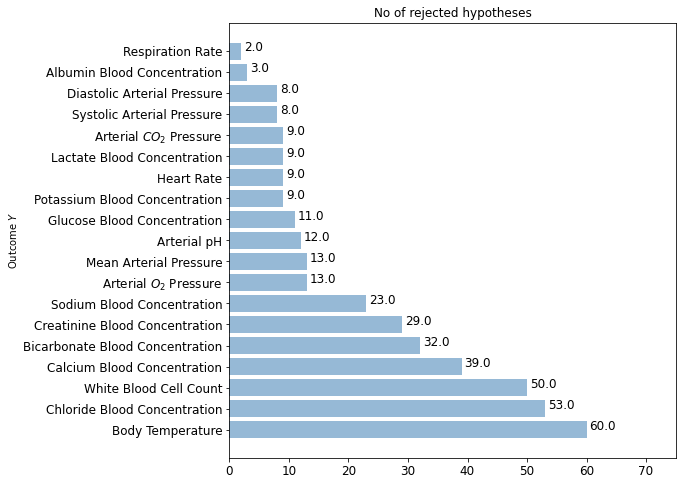

In [53]:
from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
# figure(num=None, figsize=(8, 8), dpi=80)
fig, ax = plt.subplots(figsize=(8,8))

rejected_hyp.sort_values('# rejected hypotheses', ascending=False, inplace=True)
ax.barh(rejected_hyp['Outcome $Y$'],rejected_hyp['# rejected hypotheses'],  color='#96b9d6')
y = rejected_hyp['# rejected hypotheses']
for i, v in enumerate(y):
    ax.text(v + 0.5, i, str(v), fontsize=12)

plt.title('No of rejected hypotheses')
plt.ylabel('Outcome $Y$')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
plt.style.use('ggplot')
plt.xlim([0,75])
# plt.xlabel()
plt.show()
# rejected_hyp.plot(kind='barh')

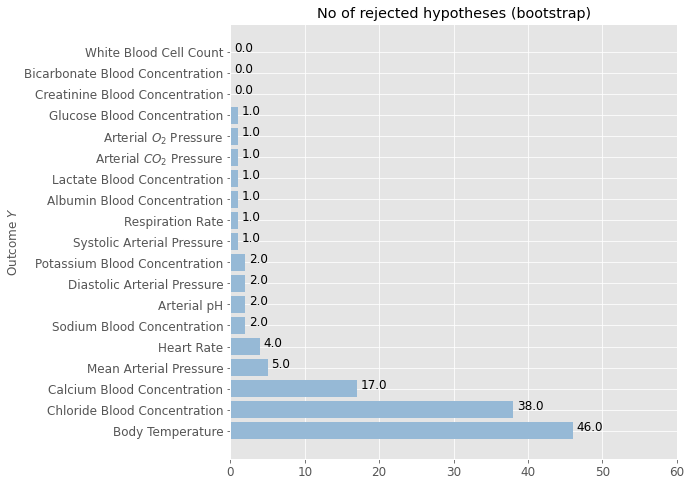

In [54]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(8,8))

rejected_hyp_bootstrap.sort_values('# rejected hypotheses', ascending=False, inplace=True)
ax.barh(rejected_hyp_bootstrap['Outcome $Y$'],rejected_hyp_bootstrap['# rejected hypotheses'],  color='#96b9d6')
y = rejected_hyp_bootstrap['# rejected hypotheses']
for i, v in enumerate(y):
    ax.text(v + 0.5, i, str(v), fontsize=12)

plt.title('No of rejected hypotheses (bootstrap)')
plt.ylabel('Outcome $Y$')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
plt.style.use('ggplot')
plt.xlim([0,60])
plt.show()

In [55]:
_, p_values, rej_hyps = rejected_hypotheses('Temp_C')

In [56]:
rej

,actions,p_lb,p_ub,trajec,n_real,n_sim
10,"[1, 1, 1, 1]",0.0,1.0,"[1, 1, 1, 1]",90.0,131.0
17,"[3, 3, 3, 3]",0.0,1.0,"[1, 1, 1, 0]",6.0,60.0
19,"[1, 1, 1, 1]",0.0,1.0,"[1, 1, 0, 0]",13.0,325.0
20,"[1, 1, 1, 1]",0.0,1.0,"[3, 3, 3, 0]",36.0,2.0
21,"[2, 2, 2, 2]",0.0,1.0,"[1, 0, 0, 0]",9.0,10.0
22,"[1, 1, 1, 1]",0.0,1.0,"[1, 3, 3, 3]",19.0,111.0
23,"[1, 1, 1, 1]",0.0,1.0,"[1, 0, 0, 0]",31.0,59.0
26,"[1, 1, 1, 1]",0.0,1.0,"[1, 1, 1, 0]",12.0,256.0
31,"[2, 2, 2, 2]",0.0,1.0,"[1, 3, 3, 3]",6.0,23.0
37,"[2, 2, 2, 2]",0.0,1.0,"[1, 1, 1, 0]",3.0,46.0


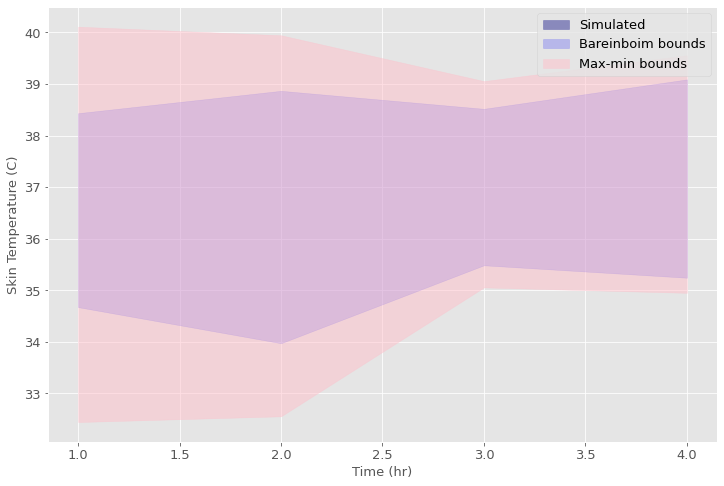

([0.509370494954345,
  0.33755274261603335,
  0.2413793103448266,
  0.16490486257928147],
 234)

In [57]:
plot_bounds('Temp_C', [0, 0, 0, 0] ,[1, 1, 1, 1])

In [72]:
_, p_values, rej_hyps = rejected_hypotheses_bootstrap('Temp_C')

In [74]:
rej_hyps.head()

,actions,p_lb,p_ub,trajec,n_real,n_sim
10,"[1, 1, 1, 1]",0.0,1.0,"[1, 1, 1, 1]",90.0,131.0
17,"[3, 3, 3, 3]",0.0,1.0,"[1, 1, 1, 0]",6.0,60.0
19,"[1, 1, 1, 1]",0.0,1.0,"[1, 1, 0, 0]",13.0,325.0
20,"[1, 1, 1, 1]",0.0,1.0,"[3, 3, 3, 0]",36.0,2.0
21,"[2, 2, 2, 2]",0.0,1.0,"[1, 0, 0, 0]",9.0,10.0


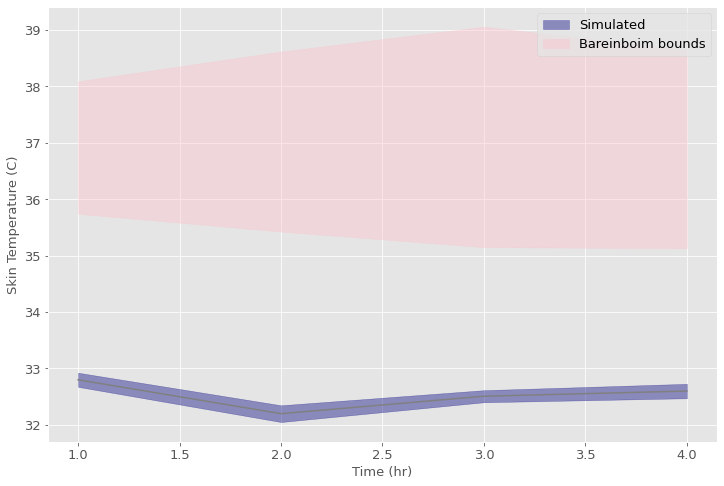

[]

In [88]:
plot_bounds_bootstrap('Temp_C', [1, 1, 0, 0], [1, 1, 1, 1])

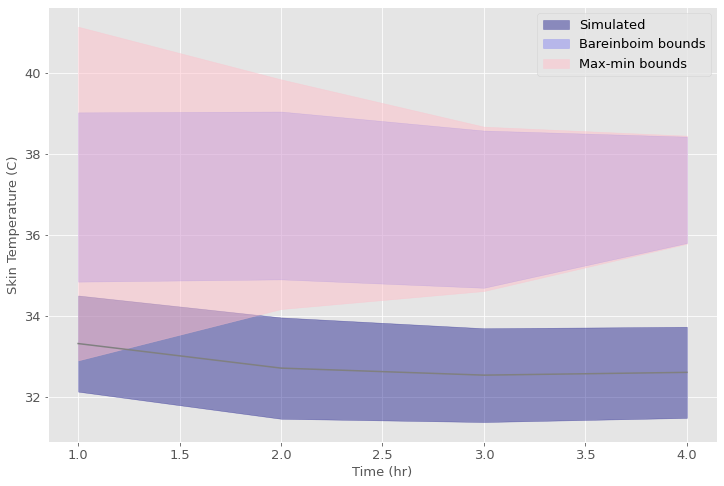

([0.49277456647399315,
  0.26926563916590984,
  0.04352941176470587,
  0.015738498789346248],
 13)

In [84]:
plot_bounds('Temp_C', [1, 1, 0, 0], [1, 1, 1, 1])